# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 0382 Азаров Максим и Шангичев Василий. Вариант №13.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

\\
**Спектр дискретного сигнала:**

Представим дискретный сигнал $\{x_k\}$ в виде функции от времени:
$$s(t)=\sum_{k=-\infty}^{\infty} x_k\delta(t-k)$$

\\
Применим преобразование Фурье, это и будет **спектром дискретного сигнала**:
$$S(\omega)=\sum_{k=-\infty}^{\infty} x_ke^{-i\omega k}$$

\\
**Дискретное преобразование Фурье(ДПФ):**

Пусть последовательность отсчётов $\{x_k\}$ является периодической с периодом $N$

$$X(n)=\sum_{k=0}^{N-1}x_ke^{-i\frac{2 \pi n}{N}k}, \quad n=0,1,2,...,N-1$$

\\
**Численного дифференцирование разностью 1-го порядка**: $$y_n = \frac{s_{n+1}-s_{n-1}}{2h}$$  

\\
**Формула трапеций**: $$y_{n+1} = y_n + \frac 1 2(s_n + s_{n+1}), y_0 = 0$$

\\
**Формула прямоугольников**:  $$y_{n+1} = y_{n} + s_{n },~~~ y_0 = 0$$

\\
**Формула Симпсона**: $$y_{n+1} = y_{n} + \frac 1 3 (s_{n-1} + 4s_n + s_{n+1}), y_0 = 0, y_1 = 0$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [18]:
# импорт библиотек
import numpy as np
import math
import matplotlib.pyplot as plt

### Задание 1

In [19]:

def generate_signal(A, omega, n, phi, cos_number):
  return np.sum([A[i] * np.cos(omega[i]*n + phi[i]) for i in range(cos_number)], axis=0)

T = 1
A_range = [1, 11]
cos_number = 11
phi_range = [0, 0.5]
N = 31

phi = np.random.uniform(phi_range[0], phi_range[1], size=cos_number)
omega = np.arange(0, 1.1, 0.1) * math.pi

A = np.random.randint(A_range[0], A_range[1] + 1, cos_number)
A = A / np.sum(A)

analog_n = np.linspace(0, N, 300)
discrete_n = np.arange(0, N+1, T)

analog_signal = generate_signal(A, omega, analog_n, phi, cos_number)
discrete_signal = generate_signal(A, omega, discrete_n, phi, cos_number)



### Задание 2

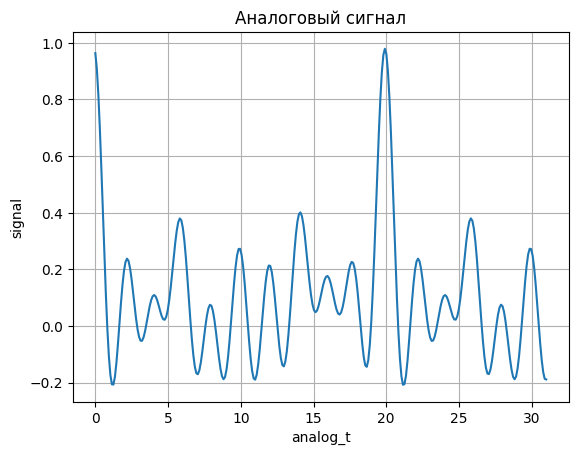

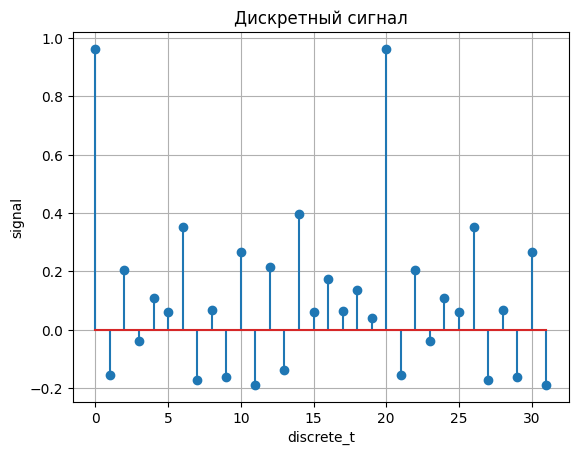

In [20]:


fig1 = plt.figure()
plt.plot(analog_n, analog_signal)
plt.title('Аналоговый сигнал')
plt.xlabel('analog_t')
plt.ylabel('signal')
plt.grid(True)
fig1.show()

fig2 = plt.figure()
plt.stem(discrete_n, discrete_signal)
plt.title('Дискретный сигнал')
plt.xlabel('discrete_t')
plt.ylabel('signal')
plt.grid(True)
fig2.show()

### Задание 3

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.


Имея один и тот же конечный набор чисел, можно рассчитать либо спектральную функцию этого дискретного сигнала по формуле
$$S(\omega)=\sum_{k=-\infty}^{\infty} x_ke^{-i\omega k}$$
либо его ДПФ по формуле:
$$X(n)=\sum_{k=0}^{N-1}x_ke^{-i\frac{2 \pi n}{N}k}, \quad n=0,1,2,...,N-1$$

ДПФ представляет собой просто дискретные отсчеты спектральной функции дискретного сигнала, соответствующие частотам $ω_n = \frac{ω_дn}{N}$.

Таким образом:
$$X(n)=S(\frac{2\pi n}{NT})=S(\omega_д\frac{ n}{N})$$

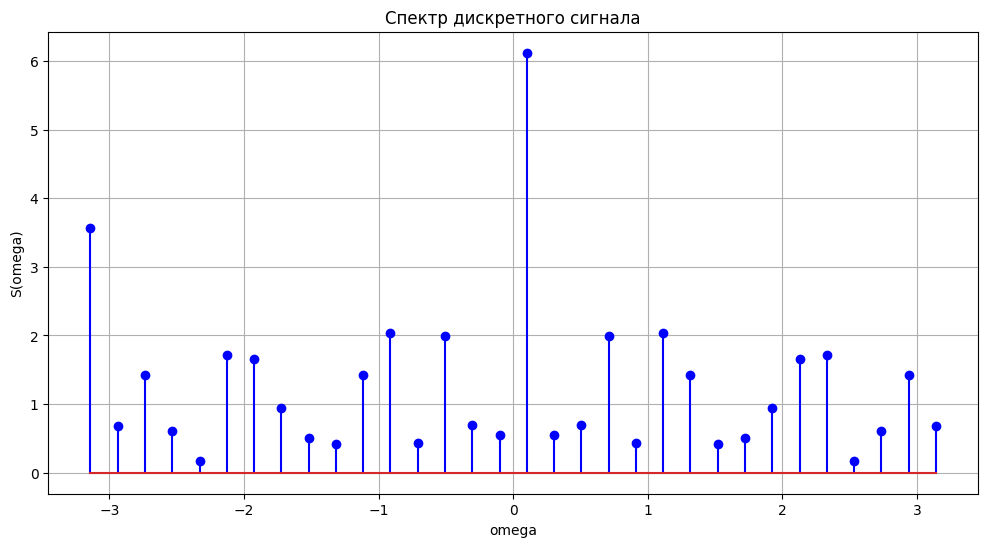

In [39]:
def DFT(x):
    # возвращает список значений для всех n
    n = np.arange(len(x))
    k = n.reshape((len(x), 1))
    e_part = np.exp(-2j * np.pi * k * n / len(x))
    return np.dot(e_part, x)

X_arr = DFT(discrete_signal)
w = np.linspace(-math.pi, math.pi, num=len(discrete_signal))

plt.figure(figsize=(12, 6))

plt.title('Спектр дискретного сигнала')
plt.stem(w, np.abs(X_arr) , 'blue')
plt.xlabel('omega')
plt.ylabel('S(omega)')
plt.grid(True)

plt.show()

### Задание 4

Линейное сглаживание по $n = 2m+1$ точкам:

$y_n = \frac1{2m+1} \sum_{k=n-m}^{n+m}s_k$

Т. к. в комплексной экспоненциальной форме полученное выражение - это геометрическая прогрессия с $r=e^{iw}$:
$$H(w) = \frac{e^{\frac{5iw}{2}} - e^{\frac{-5iw}{2}}}{5(e^{\frac{iw}{2}} - e^{\frac{-iw}{2}})} = \frac{sin(\frac{5w}{2})}{5sin(\frac{w}{2})}$$

Аналогично для сглаживания по 9 точкам:

$$H(w) = \frac{sin(\frac{9w}{2})}{9sin(\frac{w}{2})}$$


In [22]:
def convolution(arr, n):
  n = n // 2
  result = list()
  for i in range(len(arr)):
    left, right = i - n, i + n
    left, right = np.clip(0, left, len(arr)-1), np.clip(0, right, len(arr)-1)
    values = list(arr[left:(right+1)])

    values += (2 * n + 1 - len(values)) * [arr[i]]
    result.append(sum(values) / len(values))
  return np.array(result)

filtered_5, filtered_9 = convolution(discrete_signal, 5), convolution(discrete_signal, 9)

### Задание 5

График сигнала до и после фильтрации

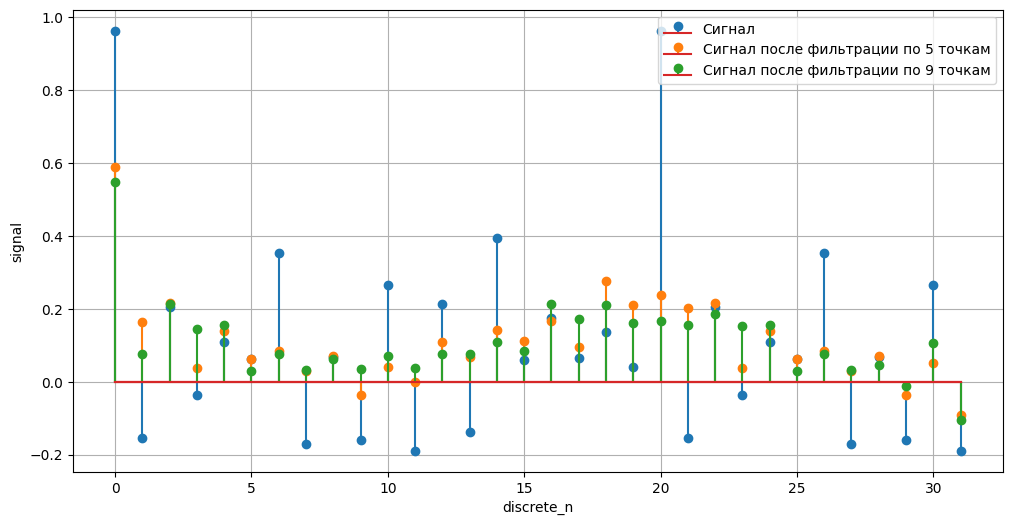

In [23]:
plt.figure(figsize=(12, 6))

plt.stem(discrete_n, discrete_signal, label='Cигнал', linefmt='C0-', markerfmt='C0o')
plt.stem(discrete_n, filtered_5, label='Cигнал после фильтрации по 5 точкам', linefmt='C1-', markerfmt='C1o')
plt.stem(discrete_n, filtered_9, label='Cигнал после фильтрации по 9 точкам', linefmt='C2-', markerfmt='C2o')

plt.xlabel('discrete_n')
plt.ylabel('signal')
plt.grid(True)

plt.legend()
plt.show()

### Задание 6

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

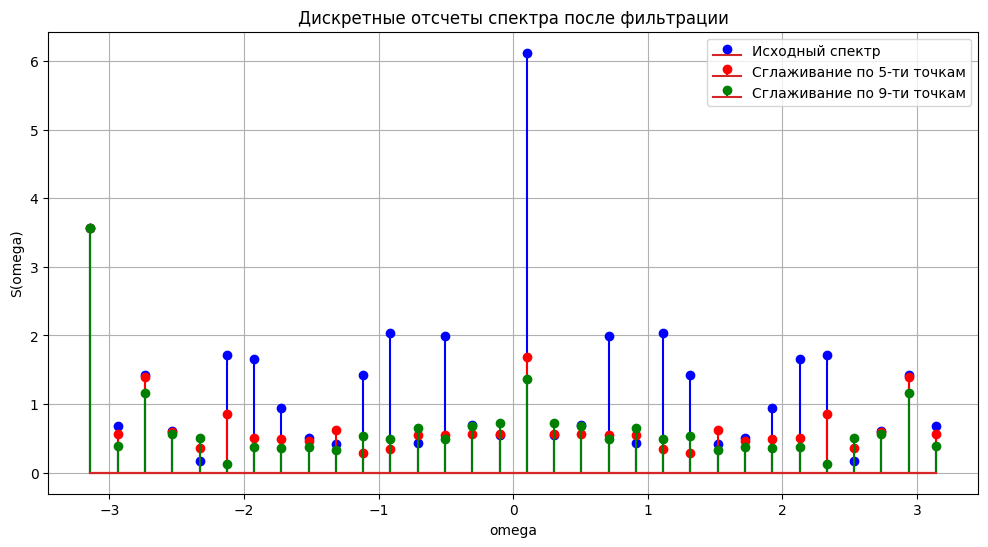

In [24]:
orig_spect = DFT(discrete_signal)
filt5_spect = DFT(filtered_5)
filt9_spect = DFT(filtered_9)

w = np.linspace(-math.pi, math.pi, num=len(discrete_signal))


plt.figure(figsize=(12, 6))
plt.title('Дискретные отсчеты спектра после фильтрации')
plt.stem(w, np.abs(orig_spect),'blue',  label='Исходный спектр')
plt.stem(w, np.abs(filt5_spect),'red',   label='Сглаживание по 5-ти точкам')
plt.stem(w, np.abs(filt9_spect), 'green', label='Сглаживание по 9-ти точкам')
plt.xlabel('omega')
plt.ylabel('S(omega)')
plt.grid(True)

plt.legend()
plt.show()

### Задание 7

Проанализировать результат на соответствие значениям $H(w)$. Сделать выводы.

Из графиков можно заметить закономерность что чем больше точек используется при сглаживании , тем меньше амплитуда у отсчетов и в $H(w)$ и в спектральных отсчетах

### Задание 8

Повторить п. 4–7 для следующих фильтров: <br>
a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка. <br>
b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

### 4a

Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка:

* Формула:

$$y_n = \frac{s_{n+1}-s_{n-1}}{2h}, ~~~~ h=T=1,~~~ s_n = e^{iwn}$$  

* Передаточные функции:


$$H(\omega)=\frac{e^{iw}-e^{-iw}}{2} = i  \sin(w)$$

In [25]:
def diff_1(arr):
    y=[0]
    for i in range(1, len(arr)-1):
        y_tmp = (arr[i+1] - arr[i-1])/2
        y.append(y_tmp)
    y.append(0)
    return y

diff_signal = diff_1(discrete_signal)


### 5a

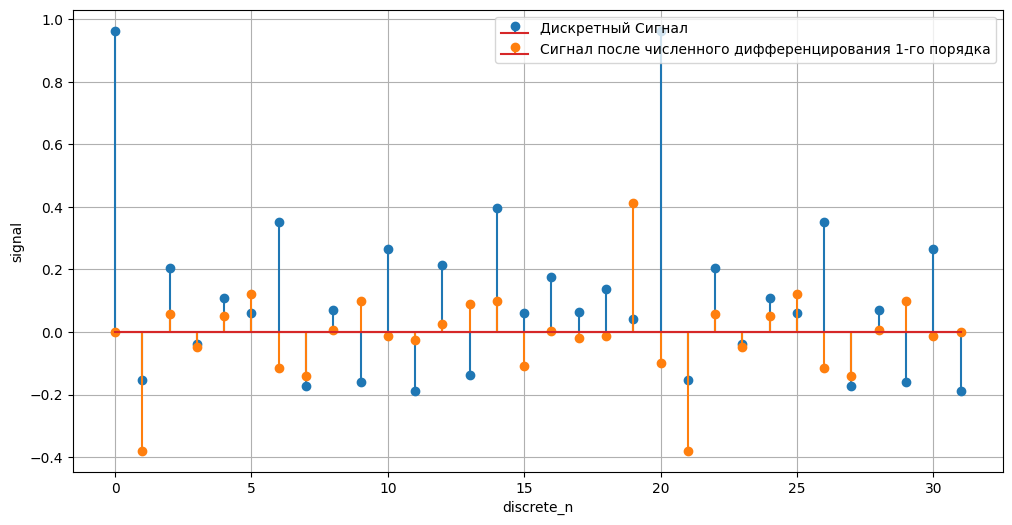

In [26]:
plt.figure(figsize=(12, 6))

plt.stem(discrete_n, discrete_signal, label='Дискретный Cигнал', linefmt='C0-', markerfmt='C0o')
plt.stem(discrete_n, diff_signal, label='Cигнал после численного дифференцирования 1-го порядка', linefmt='C1-', markerfmt='C1o')


plt.xlabel('discrete_n')
plt.ylabel('signal')
plt.grid(True)

plt.legend()
plt.show()

### 6a

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

Процедура аналогична пункту 6.

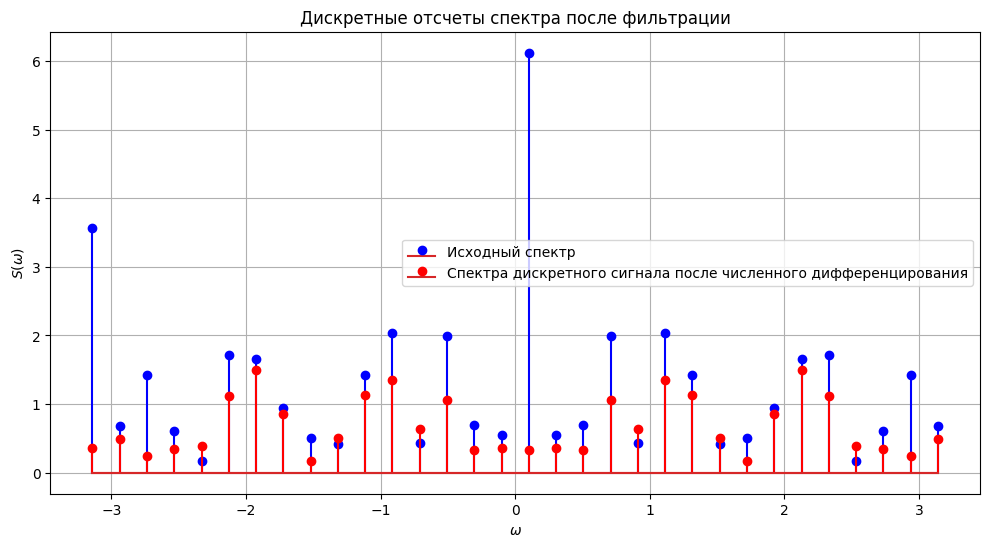

In [27]:
orig_spect = DFT(discrete_signal)
diff_spect = DFT(diff_signal)


w = np.linspace(-math.pi, math.pi, num=len(discrete_signal))


plt.figure(figsize=(12, 6))
plt.title('Дискретные отсчеты спектра после фильтрации')
plt.stem(w, np.abs(orig_spect),'blue',  label='Исходный спектр')
plt.stem(w, np.abs(diff_spect),'red',   label='Cпектра дискретного сигнала после численного дифференцирования')
plt.xlabel('$\omega$')
plt.ylabel('$S(\omega)$')
plt.grid(True)

plt.legend()
plt.show()

### 7a

Проанализировать результат на соответствие значениям $H(w)$. Сделать выводы.

Можно заметить, что амплитуда отсчетов спектра уменьшилась во всех точках

### 4b

Сглаживание соответствующее численному интегрированию (прямоугольников, трапеций, Симпсона):
* Формула:
  * трапеций:    $$y_{n+1} = y_n + \frac 1 2(s_n + s_{n+1}),~~~ y_0 = 0$$
  * прямоугольников:  $$y_{n+1} = y_{n} + s_{n }*T,~~~ y_0 = 0$$
  * Симпсона: $$y_{n+1} = y_{n} + \frac 1 3 (s_{n-1} + 4s_n + s_{n+1}), y_0 = 0, y_1 = 0$$

\\
* Передаточные функции cглаживания чиссленного интегрирования по формуле:
  * трапеций:     $$H(\omega) = \frac {\cos {\frac \omega 2}}{2i \sin {\frac \omega 2}}$$
  * прямоугольников:   $$H(\omega) = \frac 1 {2i \sin {\frac \omega 2}}$$  
  * Симпсона: $$H(\omega) = \frac {\cos {\omega} + 2}{3i \sin {\omega}}$$


In [44]:
def int_trap(arr):
    y=[0]
    for i in range(1, len(arr)):
        y_tmp = y[i-1] + (arr[i-1] + arr[i])/2
        y.append(y_tmp)
    return y

def int_rect(arr):
    y=[0]
    for i in range(1, len(arr)):
        y_tmp = y[i-1] + arr[i-1]
        y.append(y_tmp)
    return y

def int_simp(arr):
    y=[0, 0]
    for i in range(2, len(arr)):
        y_tmp = y[i-1] + (arr[i-2] + 4*arr[i-1] + arr[i])/3
        y.append(y_tmp)
    return y

int_trap_sign = int_trap(discrete_signal)
int_rect_sign = int_rect(discrete_signal)
int_simp_sign = int_simp(discrete_signal)


### 5b

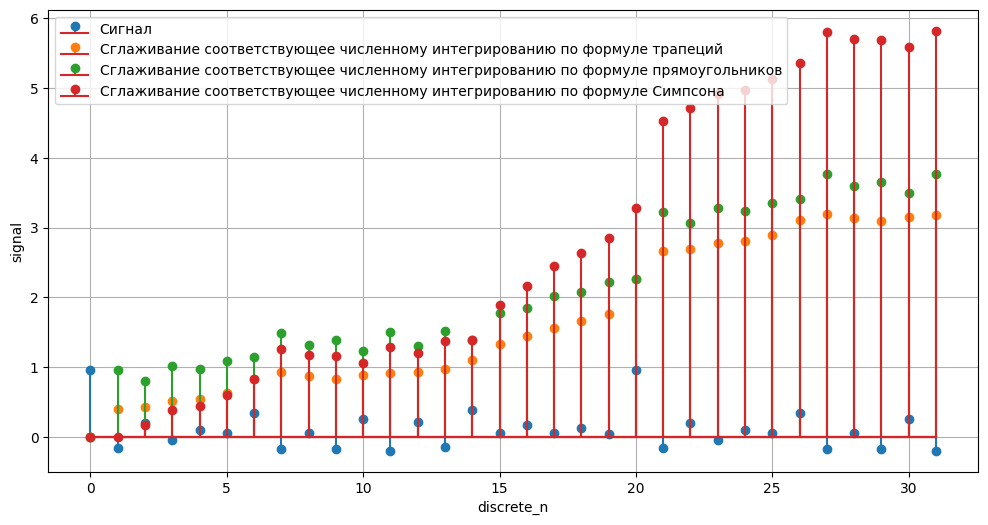

In [45]:
plt.figure(figsize=(12, 6))

plt.stem(discrete_n, discrete_signal, label='Cигнал', linefmt='C0-', markerfmt='C0o')
plt.stem(discrete_n, int_trap_sign, label='Сглаживание соответствующее численному интегрированию по формуле трапеций', linefmt='C1-', markerfmt='C1o')
plt.stem(discrete_n, int_rect_sign, label='Сглаживание соответствующее численному интегрированию по формуле прямоугольников', linefmt='C2-', markerfmt='C2o')
plt.stem(discrete_n, int_simp_sign, label='Сглаживание соответствующее численному интегрированию по формуле Симпсона', linefmt='C3-', markerfmt='C3o')

plt.xlabel('discrete_n')
plt.ylabel('signal')
plt.grid(True)

plt.legend()
plt.show()

### 6b

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

Процедура аналогична пункту 6.

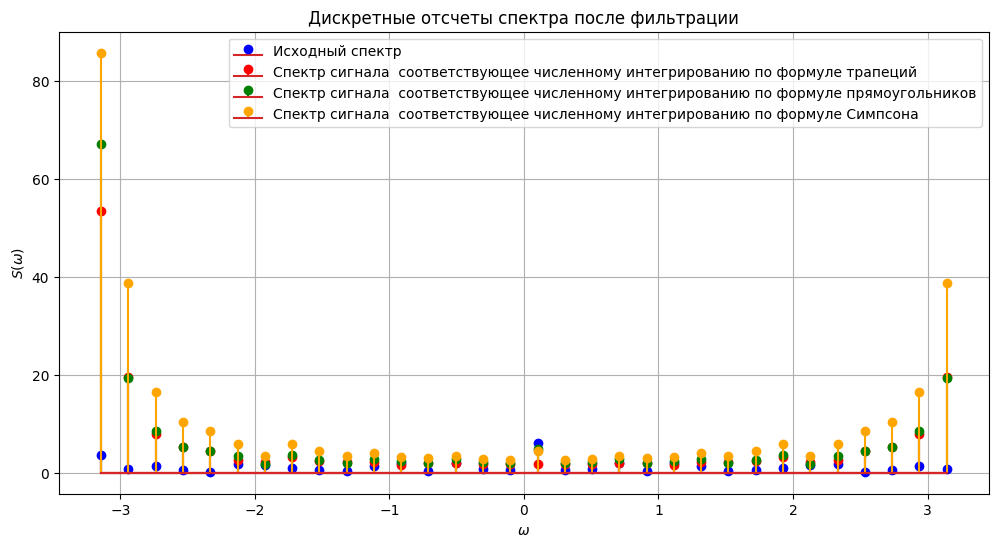

In [47]:
orig_spect = DFT(discrete_signal)
int_trap_spect = DFT(int_trap_sign)
int_rect_spect = DFT(int_rect_sign)
int_simp_spect = DFT(int_simp_sign)


w = np.linspace(-math.pi, math.pi, num=len(discrete_signal))


plt.figure(figsize=(12, 6))
plt.title('Дискретные отсчеты спектра после фильтрации')
plt.stem(w, np.abs(orig_spect),'blue',  label='Исходный спектр')
plt.stem(w, np.abs(int_trap_spect),'red',   label='Спектр сигнала  соответствующее численному интегрированию по формуле трапеций')
plt.stem(w, np.abs(int_rect_spect), 'green', label='Спектр сигнала  соответствующее численному интегрированию по формуле прямоугольников')
plt.stem(w, np.abs(int_simp_spect), 'orange', label='Спектр сигнала  соответствующее численному интегрированию по формуле Симпсона')
plt.xlabel('$\omega$')
plt.ylabel('$S(\omega)$')
plt.grid(True)

plt.legend()
plt.show()

### 7b

Проанализировать результат на соответствие значениям $H(w)$. Сделать выводы.

Можно заметить, что возсле краевых значений периода амплитуда спектра значительно увеличивается с увеличением порядка квадратуры

## Выводы


В результате выполнения практической работы, были получены  навыки выполнения фильтрации дискретных последовательнстей, с помощью фильтров ***основанных на формулах численного дифференцирования и интегрирования***. Также был приобретен опыт в анализе получаемых результатов с помощью **дискретного преобразования Фурье (ДПФ)**. Сначала был сгенерирован дискретный сигнал , посредством дискретизации непрерывного сигнала. Для данного сигнала были найдены дискретные отсчеты спектра с помощью **дискретного преобразования Фурье**. Затем был произведен сравнительный анализ полученого спектра со спектрами сглаженых дискретных сигналов , посредством линейного сглаживания и  численного дифференцирования 1-го порядка и численного интегрирования на основе формул трапеции, прямиугольника и Симсона . В результате чего было выясненно что рассмотренные фильтры сглаживания имеют различные спектры, это связанно с тем что они рашают различные задачи. Однако в одной категории, например фильтров численного интегрирования ,  спектры довольно схожи. Все дискретные функции и спектры были визуализированы в ходе работы .
